## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

## Reading the dataset into dataframe

In [2]:
#Creating a dataframe called emoji_data
emoji_data = pd.read_csv("twitter_data.csv")
emoji_data

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2
...,...,...
49995,My #O2otd Love this chain so much and our new ...,1
49996,Met Santa and Olaf @ the North Pole today @ No...,0
49997,New York by Night Strideby #HERElocationNYC......,11
49998,Kisses for the birthday girl! @ Helzberg Diamonds,0


In [3]:
emoji_data.head(10)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2
5,Dinner in FLA tonight // Pan-seared salmon ove...,1
6,It's my fav seniors last game congrats on beat...,8
7,I got to to go formal with my best friend @ Ph...,0
8,'Cause I Miss My Little Homies .#Throwback #Co...,13
9,"Birthday Kisses @ Madison, Wisconsin",9


## Find out number of observatoins and columns

In [4]:
emoji_data.shape

(50000, 2)

### From the above we can see that there are 50000 observations and 2 columns

## Column data types

In [5]:
emoji_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   50000 non-null  object
 1   Label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [6]:
emoji_data.dtypes

Tweet    object
Label     int64
dtype: object

## Checking for number of unique categories for categorical variables.

In [7]:
print(emoji_data["Tweet"].nunique())

49767


In [8]:
emoji_data['Tweet'].value_counts()

@ New York, New York                                                                            25
@ Los Angeles, California                                                                       15
@ Disney's Magic Kingdom                                                                        13
@ Epcot - Walt Disney World                                                                      7
@ Times Square, New York City                                                                    6
                                                                                                ..
#Repost @user wee video... #SpiritAnimals #RotofugiGallery #FauxTaxidermy…                       1
Round 2 for Walking Tacos! Come quick while supplies last Hope everyone has a great day!…        1
Love all the artwork at the z lot : electriclindsayland @ The Z                                  1
See you in 2 months, Baby Lana! @ La Macro                                                       1
Dinner wit

## Checking for missing values

In [9]:
emoji_data.isnull().sum()

Tweet    0
Label    0
dtype: int64

## Distribution of target column ('Label')

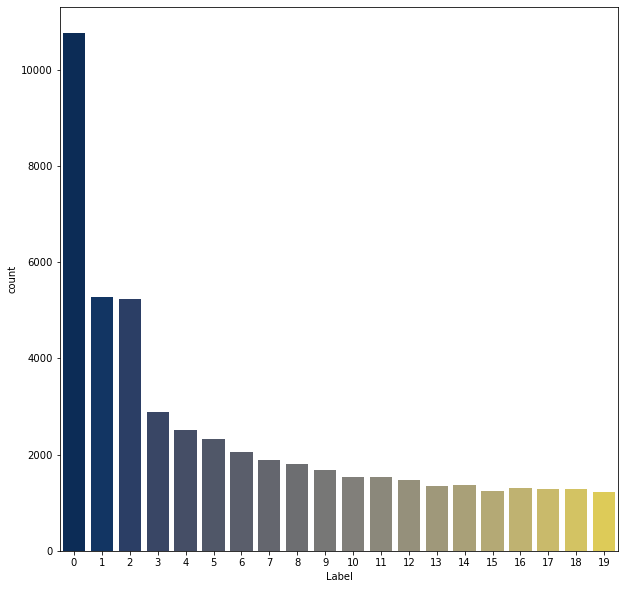

In [9]:
## Since the target column is 'Label' we are going to find out the distribution of it
plt.figure(figsize=(10,10))
sns.countplot(x="Label", data=emoji_data, palette="cividis")
plt.show()

In [11]:
emoji_data['Label'].value_counts()

0     10760
1      5279
2      5241
3      2885
4      2517
5      2317
6      2049
7      1894
8      1796
9      1671
10     1544
11     1528
12     1462
14     1377
13     1346
16     1306
18     1286
17     1279
15     1249
19     1214
Name: Label, dtype: int64

## Distribution of length of tweets

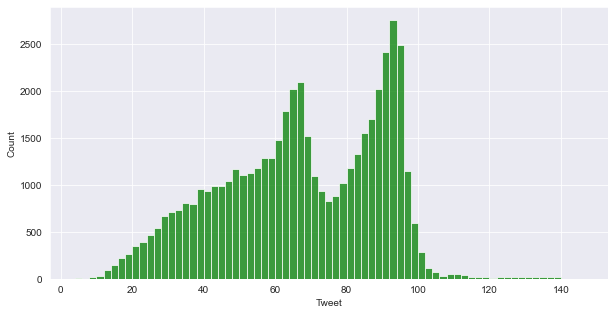

In [23]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.histplot(emoji_data["Tweet"].apply(len),color='green')
plt.show()

## Emoji Mapping 

In [24]:
emoji_raw = open('us_mapping.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    print(sentence)
    sentence = sentence.rstrip()
    emojis.append(sentence)

mapp = []
emos = []
sent = []

for e in emojis:
    mapp.append(e.split()[0])
    emos.append(e.split()[1])
    sent.append(" ".join(e.split()[2:]))

df_em = pd.DataFrame({'Label':mapp})
df_em["Emoji"] = emos
df_em["Description"] = sent

0	❤️	 Red heart	

1	😍	 Smiling face with hearteyes	

2	😂	 Face with tears of joy	

3	💕	 Two hearts

4	🔥	 Fire

5	😊	 Smiling face with smiling eyes	

6	😎	 Smiling face with sunglasses	

7	✨	 Sparkles 	

8	💙	 Blue heart

9	😘	 Face blowing a kiss	

10	📷	 Camera	

11	🇺🇸	 United States	

12	☀️	 Sun

13	💜	 Purple heart 	

14	😉	 Winking face	

15	💯	 Hundred points	

16	😁	 Beaming face with smiling eyes	

17	🎄	Christmas tree	

18	📸	Camera with flash

19	😜	Winking face with tongue	



## Pre-Processing & Cleaning of Data for Machine Learning Modeling

### Cleaning of tweets from dataset

In [25]:
import string
import re 

def tweet_clean(tweet):
    tweet = str(tweet).lower()                                             # Converting text to lower case.
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # '@' mentioned in tweets to be deleted
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             #  RT mentioned in tweets to be deleted 
    rm_links = re.sub(r'http\S+', '', rm_rt)                               #  hyperlinks in tweets to be deleted
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # numbers in tweets to be deleted
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # punctuations in tweets to be deleted
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [26]:
Cleaned_tweet = emoji_data['Tweet'][4]
cleaned = tweet_clean(Cleaned_tweet)
print("Cleaned : ",cleaned)

Cleaned :  who never  a galaxy far far away


In [27]:
emoji_data["Tweet"] = emoji_data["Tweet"].apply(tweet_clean)
emoji_data.head(5)

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


## Pre-Processing of tweets by Removal of Stop words & Lemmatization of text

In [28]:
import nltk
nltk.download('wordnet')                                        # To find releationship between words such as synonyms and antonyms etc. 
import spacy                                                    # It helps to build information extraction of nlp. 
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")                              # It is a small English pipeline trained on written web text
lemmatizer = WordNetLemmatizer()
def tweet_preprocessing(tweet, nlp=nlp, lemmatizer=lemmatizer):
    stop_words = nlp.Defaults.stop_words     
    rm_stop_words_lemma = []
    doc = nlp(tweet)
    for token in doc:                                            
        if token.text not in stop_words and token.pos_!="PUNCT": # removing stop words such as a, an, the
            lemma_word = lemmatizer.lemmatize(token.text)        # lemmatizing the tweets
            rm_stop_words_lemma.append(lemma_word)                  
    processed = " ".join(rm_stop_words_lemma)
    return processed

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
tweet_sample = emoji_data['Tweet'][4]
cleaned_sample = tweet_clean(tweet_sample)
print("Sample    : ",cleaned_sample)
print("Processed : ",tweet_preprocessing(cleaned_sample))

Sample    :  who never  a galaxy far far away
Processed :    galaxy far far away


In [19]:
emoji_data["Tweet"] = emoji_data["Tweet"].apply(tweet_preprocessing)
emoji_data.head(10)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
5,dinner fla tonight panseared salmon couscous...,1
6,fav senior game congrats beating west west s...,8
7,got formal best friend phi mu jsu,0
8,cause miss little homies throwback cousinlove ...,13
9,birthday kiss madison wisconsin,9


In [20]:
# Exporting the cleaned data for applying ML models
emoji_data.to_csv('Cleaned_Twitter_Data.csv',index = False)

In [21]:
# Removing tweets which contains Null words
indexnull = emoji_data[(emoji_data['Tweet'].isnull()) | 
                   (emoji_data['Tweet']==" ") | (emoji_data['Tweet']=="  ") |
                  (emoji_data['Tweet']=="   ")].index

In [22]:
emoji_data.drop(indexnull , inplace=True)

In [23]:
emoji_data.shape

(49982, 2)

## CountVectorizer on tweets for ML models

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
c_vect = CountVectorizer()
X = c_vect.fit_transform(emoji_data["Tweet"])
c_vect.get_feature_names()[100:110]

['absence',
 'absentee',
 'absinthe',
 'absolut',
 'absolute',
 'absolutely',
 'absolutelybesutifulflower',
 'absolutelythem',
 'absolutly',
 'abstract']

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
emoji_data_mini = emoji_data.iloc[:10]                # For sample applying CountVectorizer on 10 rows of data. 
c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(emoji_data_mini["Tweet"])
x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names()
count_vec

,amp,away,beating,best,birthday,cause,congrats,couscous,cousinlove,decision,...,veggie,vilo,wake,wall,walt,water,west,wisconsin,yesterday,yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### from the above output we can see that for 10 rows of tweets, 62 columns are generated. In similar way for all the 49982 rows of tweets, 54382 columns are generated by applying CountVectorizer

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
y = emoji_data["Label"].values
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [27]:
X_train.shape

(42484, 54382)

In [28]:
y_train.shape

(42484,)

In [29]:
y_test.shape

(7498,)

In [30]:
X_test.shape

(7498, 54382)

### Multinomial Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)

In [33]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.85      0.39      1622
           1       0.21      0.15      0.18       771
           2       0.39      0.43      0.41       828
           3       0.11      0.01      0.02       453
           4       0.41      0.23      0.29       338
           5       0.14      0.01      0.02       342
           6       0.24      0.02      0.04       311
           7       0.27      0.04      0.07       311
           8       0.50      0.02      0.03       263
           9       0.20      0.00      0.01       232
          10       0.32      0.03      0.06       226
          11       0.80      0.24      0.37       216
          12       0.58      0.16      0.25       248
          13       0.20      0.01      0.01       187
          14       0.00      0.00      0.00       209
          15       0.71      0.02      0.05       215
          16       0.00      0.00      0.00       183
          17       0.72    

### Support Vector Machine

In [34]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [35]:
y_predict_test = clf.predict(X_test)

In [36]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.26      0.89      0.40      1622
           1       0.32      0.10      0.15       771
           2       0.39      0.40      0.40       828
           3       0.00      0.00      0.00       453
           4       0.57      0.28      0.37       338
           5       0.00      0.00      0.00       342
           6       0.47      0.02      0.04       311
           7       0.43      0.07      0.12       311
           8       0.32      0.03      0.06       263
           9       0.67      0.01      0.02       232
          10       0.50      0.03      0.05       226
          11       0.73      0.38      0.50       216
          12       0.46      0.40      0.42       248
          13       0.67      0.01      0.02       187
          14       0.00      0.00      0.00       209
          15       0.50      0.00      0.01       215
          16       0.00      0.00      0.00       183
          17       0.64    

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

### LogisticRegression

In [39]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.30      0.57      0.39      1622
           1       0.20      0.22      0.21       771
           2       0.35      0.43      0.39       828
           3       0.13      0.07      0.09       453
           4       0.36      0.36      0.36       338
           5       0.10      0.06      0.07       342
           6       0.14      0.10      0.12       311
           7       0.22      0.13      0.16       311
           8       0.18      0.10      0.12       263
           9       0.11      0.05      0.07       232
          10       0.20      0.09      0.12       226
          11       0.57      0.48      0.52       216
          12       0.43      0.38      0.40       248
          13       0.13      0.05      0.07       187
          14       0.07      0.03      0.04       209
          15       0.25      0.11      0.15       215
          16       0.09      0.03      0.05       183
          17       0.65    

### Decision Tree

In [40]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  

DTmodel= DecisionTreeClassifier(criterion='entropy', random_state=0)  
DTmodel.fit(X_train, y_train)
model_Evaluate(DTmodel)

              precision    recall  f1-score   support

           0       0.29      0.44      0.35      1622
           1       0.15      0.15      0.15       771
           2       0.25      0.38      0.30       828
           3       0.11      0.06      0.07       453
           4       0.24      0.26      0.25       338
           5       0.06      0.06      0.06       342
           6       0.08      0.05      0.06       311
           7       0.14      0.06      0.09       311
           8       0.10      0.07      0.08       263
           9       0.08      0.06      0.07       232
          10       0.14      0.08      0.10       226
          11       0.41      0.38      0.39       216
          12       0.33      0.34      0.34       248
          13       0.04      0.02      0.03       187
          14       0.05      0.02      0.03       209
          15       0.07      0.04      0.05       215
          16       0.03      0.02      0.03       183
          17       0.55    

### Random Forest 

In [41]:
#Fitting RandomForest classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
RFmodel= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
RFmodel.fit(X_train, y_train) 
model_Evaluate(RFmodel)

              precision    recall  f1-score   support

           0       0.27      0.50      0.35      1622
           1       0.15      0.15      0.15       771
           2       0.24      0.38      0.30       828
           3       0.09      0.06      0.07       453
           4       0.28      0.23      0.25       338
           5       0.07      0.06      0.06       342
           6       0.08      0.04      0.05       311
           7       0.16      0.05      0.07       311
           8       0.09      0.03      0.05       263
           9       0.06      0.04      0.05       232
          10       0.11      0.03      0.05       226
          11       0.45      0.39      0.42       216
          12       0.36      0.34      0.35       248
          13       0.05      0.02      0.03       187
          14       0.02      0.00      0.01       209
          15       0.08      0.03      0.05       215
          16       0.03      0.01      0.02       183
          17       0.58    

### XGBoost

In [42]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
model_Evaluate(xgb_classifier)

              precision    recall  f1-score   support

           0       0.26      0.84      0.39      1622
           1       0.33      0.14      0.20       771
           2       0.45      0.32      0.37       828
           3       0.22      0.02      0.04       453
           4       0.55      0.32      0.40       338
           5       0.17      0.01      0.02       342
           6       0.33      0.07      0.12       311
           7       0.41      0.11      0.17       311
           8       0.35      0.07      0.12       263
           9       0.26      0.03      0.05       232
          10       0.29      0.05      0.08       226
          11       0.67      0.47      0.55       216
          12       0.43      0.38      0.40       248
          13       0.36      0.03      0.05       187
          14       0.09      0.00      0.01       209
          15       0.30      0.04      0.07       215
          16       0.17      0.01      0.02       183
          17       0.59    